<a href="https://colab.research.google.com/github/jessewilliamfreeman/cs480student/blob/main/04/Jesse_Freeman_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

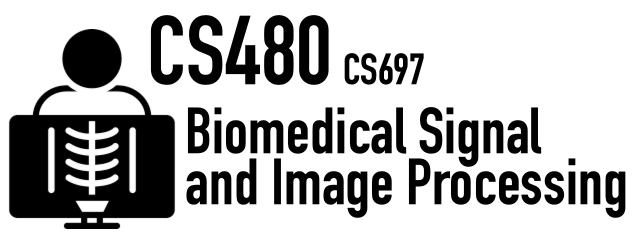
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7MB 9.2MB/s 


In [3]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [6]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [7]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [12]:
# TODO: Please display this image and print the dimensions!

(1858, 2090)


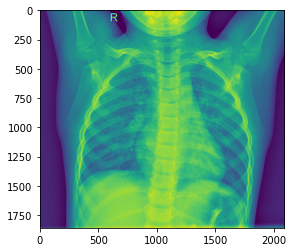

In [13]:
imshow(img)
print(img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [14]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [15]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Load the image into a numpy array and resize it
# TODO: Operation 2) Add it to the end of the first dimention of a numpy array
#                    of images.

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

(100, 300, 300)

<Figure size 432x288 with 0 Axes>

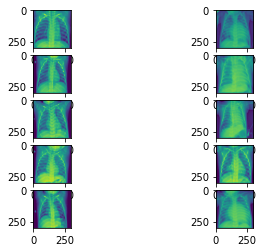

In [17]:
# Using the first answer from stack overflow below
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

plt.figure()

f, axarr = plt.subplots(5,2) 

axarr[0][0].imshow(normal_images[0])
axarr[1][0].imshow(normal_images[1])
axarr[2][0].imshow(normal_images[2])
axarr[3][0].imshow(normal_images[3])
axarr[4][0].imshow(normal_images[4])
axarr[0][1].imshow(pneumonia_images[0])
axarr[1][1].imshow(pneumonia_images[1])
axarr[2][1].imshow(pneumonia_images[2])
axarr[3][1].imshow(pneumonia_images[3])
axarr[4][1].imshow(pneumonia_images[4])

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [18]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [21]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = ([0] * TRAINING_COUNT) + ([1] * TRAINING_COUNT)

In [22]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [23]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = ([0] * TESTING_COUNT) + ([1] * TESTING_COUNT)

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [24]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [25]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# Random Forest Classifiers are Forests of Decision Trees that are all trained
# on various subsamples of the training set. When classifying, each Tree 
# classifies the input and then the most common classification of the Forest
# is the final result. 

In [32]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9625

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# The result is pretty good, with 96.25% accuracy. Im not too supprised because
# looking at the images printed out back in Task 2, the normal images are all
# pretty similar to each other, while the pneumonic lungs are much more 
# irregular and often have much less empty space in the lungs/ribs.

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?


Image Class:1

Image Class:0

Image Class:0


<Figure size 432x288 with 0 Axes>

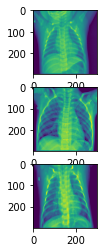

In [40]:
# TODO: YOUR CODE AND YOUR ANSWER
actual = clf.predict(testing_data)
bad_indexes = []
for i in range(len(actual)):
  if actual[i] != testing_target[i]:
    bad_indexes.append(i)
    print("\nImage Class:" + str(actual[i]))

plt.figure()

g, bad_images = plt.subplots(len(bad_indexes), 1)

for i in range(len(bad_indexes)):
  bad_images[i].imshow(testing_data[bad_indexes[i]].reshape((300,300)))

# Looks like the first one is pnemonic but the chest doesnt fill the whole
# image so I can see it being miss classified because it might have the 
# same average pixel intensity as a normal image. 
# The other two are pnemonic but dont seem to show as much stuff clogging 
# the lungs as other pnemonic images.

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# Not really sure if this could be improved much more. 
#
# If the first image is of a child then including more children in 
# the training set could improve it.
# The last two pnemonic images dont look much different than normal ones to me.
#
# But if there are parts of them that a doctor could recognize as pnemonic
# then maybe we could move on to some kind of Convolutional Neural Network
# classifier and see if it has better performance.
#
# Could try some CNNs anyway, just to see how they do.

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw